In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_needed = ["Order Date", "Purchase Price Per Unit", "Quantity", "Category", "Survey ResponseID", "Shipping Address State", "ppt", "tmin", "tmax", "tavg"]

transactions_temp = pd.read_csv("./Data/data_combined.csv", usecols=data_needed)
transactions_temp["Order Date"] = pd.to_datetime(transactions_temp["Order Date"]) # Formating Order date back to Datetime dtype, in read_csv you cant set column to datetime so need to do manually

In [3]:
#transactions_temp.groupby("Shipping Address State").sum()

#### Calculating total amount of each transactions (Quantity * Unit price) 

In [4]:
transactions_temp["Revenue"] = transactions_temp["Purchase Price Per Unit"] * transactions_temp["Quantity"]

# Filtering out States where we dont have Temperature information Alaska, Hawaii, Puerto Rico?, District of Columbia TBD with Prof

In [5]:
transactions_temp = transactions_temp[~transactions_temp["Shipping Address State"].isin(["AK", "HI", "PR", "DC", "I did not reside in the United States"])] # Remove Shipping addresses without temperature information


transactions_temp  = transactions_temp[(transactions_temp['Order Date'] < '2024-01-01')] # Remove transactions from 2024 (we only have one transaction + temperature might be inaccurate)

#### Creating subset for fashion, or Grocers

In [6]:
Fashion = [
    "ACCESSORY", "ADULT_COSTUME", "APPAREL", "APPAREL_BELT", "APPAREL_GLOVES",
    "APPAREL_HEAD_NECK_COVERING", "APPAREL_PIN", "APPENDAGE_WARMER", "APRON",
    "ARM_SLEEVE", "Apparel", "BABY_JUMPER_WALKER", "BELTS", "BLAZER",
    "BLUE_LIGHT_BLOCKING_EYEGLASSES", "BODYSTOCKING", "BOOT", "BRA", "BRACELET",
    "BRA_UNDERWEAR_SET", "CHOLI", "COAT", "COORDINATED_OUTFIT", "CORRECTIVE_EYEGLASSES",
    "CORSET", "DRESS", "DUPATTA", "EARMUFF", "EARRING", "ETHNIC_WEAR",
    "FASHIONEARRING", "FASHIONNECKLACEBRACELETANKLET", "FASHIONOTHER", "FASHIONRING",
    "FASHION_JEWELRY", "FINEEARRING", "FINENECKLACEBRACELETANKLET", "FINERING",
    "FOOTWEAR", "GUILD_APPAREL", "GUILD_JEWELRY", "GUILD_SHOES", "HAT", "HOSIERY",
    "JEWELRY", "JEWELRY_SET", "KIMONO", "KURTA", "LEG_SLEEVE", "LEOTARD",
    "MOISTURIZING_SOCK_GLOVE", "NECKLACE", "NECKTIE", "NIGHTGOWN_NIGHTSHIRT",
    "ORCA_SHIRT", "OUTERWEAR", "OVERALLS", "PAJAMAS", "PANTS", "PIERCING_JEWELRY",
    "ROBE", "SANDAL", "SAREE", "SHIRT", "SHOES", "SHORTS", "SKIRT", "SLEEPWEAR",
    "SLIPPER", "SNOWSHOE", "SNOWSUIT", "SNOW_PANT", "SOCK", "SOCKSHOSIERY", "SUIT",
    "SUNGLASSES", "SUSPENDER", "SWEATER", "SWEATSHIRT", "SWIMWEAR", "SWIM_CAP",
    "TIGHTS", "TRACK_SUIT", "UNDERPANTS", "UNDERWEAR", "UNDERGARMENT_SLIP",
    "UNDERGARMENT_THIGH_SLIMMER", "UNION_SUIT", "VEST", "WATCH", "WATCHES", "WATCH_BAND"
]


Groceries = [
   "ALCOHOLIC_BEVERAGE", "BABY_FOOD", "BABY_FORMULA", "BAKING_CHOCOLATE", "BEER",
   "BEVERAGE", "BREAD", "BREAKFAST_CEREAL", "CAKE", "CANDY", "CEREAL",
   "CHOCOLATE_CANDY", "COFFEE", "CONDIMENT", "COOKIE", "CRACKER", "CULINARY_SALT",
   "DAIRY_BASED_BUTTER", "DAIRY_BASED_CHEESE", "DAIRY_BASED_CREAM",
   "DAIRY_BASED_DRINK", "DAIRY_BASED_ICE_CREAM", "DAIRY_BASED_PUDDING",
   "DAIRY_BASED_YOGURT", "DONUT", "DRINK_FLAVORED", "EDIBLE_OIL_VEGETABLE",
   "FLOUR", "FRUIT", "FRUIT_SNACK", "FUDGE", "GOURMET_FOOD", "GROCERY", "Grocery",
   "HEALTH_FOOD", "HONEY", "JERKY", "JUICE_AND_JUICE_DRINK", "LEGUME",
   "MEAL_REPLACEMENT_BEVERAGE", "MEAT_ALTERNATIVE", "MILK_SUBSTITUTE",
   "NON_DAIRY_CHEESE", "NON_DAIRY_CREAM", "NON_DAIRY_ICE_CREAM",
   "NON_DAIRY_PUDDING", "NON_DAIRY_YOGURT", "NOODLE", "NUTS", "NUT_AND_SEED",
   "NUT_BUTTER", "OLIVE", "PACKAGED_SOUP_AND_STEW", "PASTRY", "POPCORN",
   "PRETZEL", "PROTEIN_DRINK", "PROTEIN_SUPPLEMENT_POWDER", "PUFFED_SNACK",
   "RICE_MIX", "RICE_WINE", "SALAD_DRESSING", "SEAFOOD", "SEASONING",
   "SNACK_CHIP_AND_CRISP", "SNACK_FOOD", "SNACK_FOOD_BAR", "SNACK_MIX",
   "SPORTS_DRINK", "SUGAR", "SUGAR_CANDY", "SUGAR_SUBSTITUTE", "SYRUP", "TEA",
   "TOFU", "VEGETABLE", "VEGETARIAN_EGG_SUBSTITUTE", "WATER"
]

In [7]:
mask_fashion = transactions_temp["Category"].isin(Fashion)
Fashion_transactions = transactions_temp[mask_fashion]
Fashion_transactions = Fashion_transactions.sort_values(["Order Date"]).copy() # .copy() to create new dataframe in memory and not a pd view


mask_groceries = transactions_temp["Category"].isin(Groceries)
Grocerie_transactions = transactions_temp[mask_groceries]
Grocerie_transactions = Grocerie_transactions.sort_values(["Order Date"]).copy()

In [8]:
#print(Fashion_transactions["Shipping Address State"].count()) # One Category seems to be missing (maybe typo), or upper and lower letters
#print(Grocerie_transactions["Category"].nunique())

In [9]:
#Fashion_transactions.groupby("Shipping Address State").agg({"Shipping Address State": "count"}).sort_values("Shipping Address State", ascending= False)

print(Fashion_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))


print(Grocerie_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))

Shipping Address State
CA    15069
TX    11823
FL    10651
NY     9974
PA     8993
Name: Shipping Address State, dtype: int64
Shipping Address State
CA    19988
TX    13967
NY    13351
PA    11386
FL     9185
Name: Shipping Address State, dtype: int64


#### Lagging line plot for Fashion and groceries 

#### Subsetting for only CA 

In [ ]:
"""## Fashion
CA_filter = Fashion_transactions["Shipping Address State"]== "NC"

CA_fashion = Fashion_transactions[CA_filter]


CA_fashion  = CA_fashion[(CA_fashion['Order Date'] > '2018-01-01') & (CA_fashion['Order Date'] < '2018-02-01')]
CA_fashion = CA_fashion.sort_values("Order Date", ascending=True)

## Groceries
Groceries_filter = Grocerie_transactions["Shipping Address State"]== "NC"

CA_Groceries = Grocerie_transactions[Groceries_filter]

CA_Groceries  = CA_Groceries[(CA_Groceries['Order Date'] >= '2018-1-1') & (CA_Groceries['Order Date'] < '2019-01-01')] 

CA_Groceries = CA_Groceries.sort_values("Order Date", ascending=True)"""


### Plotting

Create plot showing Date on x axis
Using double y axis, one for temp and one for revenue
https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/

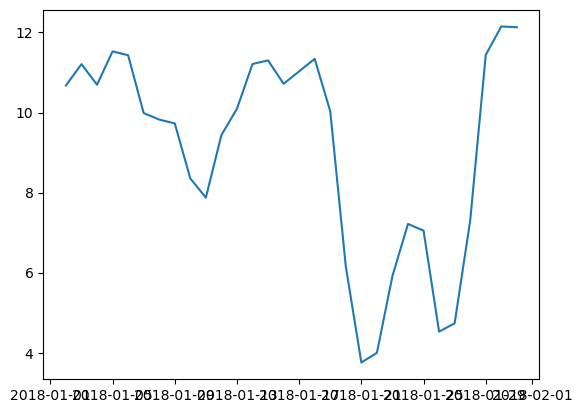

In [11]:
fig, ax = plt.subplots()
ax.plot(CA_fashion["Order Date"], CA_fashion["tavg"])
plt.show()

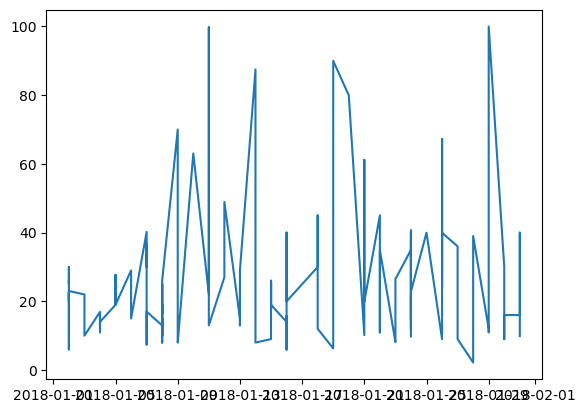

In [12]:
fig, ax = plt.subplots()
ax.plot(CA_fashion["Order Date"], CA_fashion["Revenue"])
plt.show()

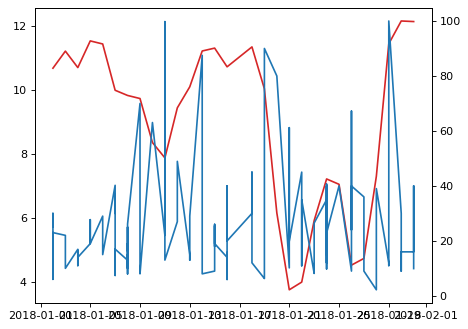

In [13]:

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1, dpi= 80)
ax1.plot(CA_fashion["Order Date"], CA_fashion["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(CA_fashion["Order Date"], CA_fashion["Revenue"], color='tab:blue')

#### Groceries

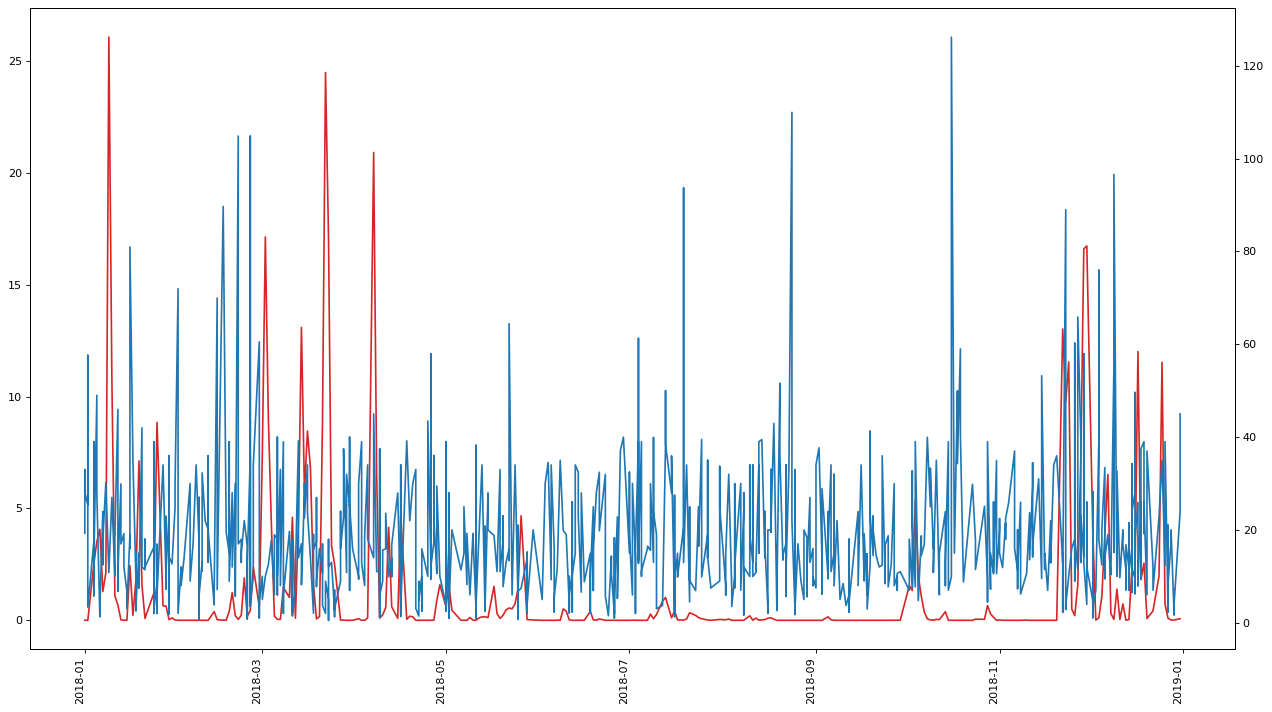

In [14]:

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(CA_Groceries["Order Date"], CA_Groceries["ppt"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(CA_Groceries["Order Date"], CA_Groceries["Revenue"], color='tab:blue')

# Formating
# ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels

plt.tight_layout()


### Cal Total revenue on each day and combine it

In [15]:
# Tring different grouping 
#CA_Groceries_grouped = CA_Groceries.groupby("Order Date")["Revenue"].sum().plot()

In [16]:
#CA_Groceries_Daily_Rev = CA_Groceries[["Order Date", "tavg"]]

#CA_Groceries_Daily_Rev = CA_Groceries_Daily_Rev.merge(CA_Groceries_grouped, on="Order Date")

In [17]:

# Plot Line1 (Left Y Axis)
#fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
#ax1.plot(CA_Groceries_Daily_Rev["Order Date"], CA_Groceries_Daily_Rev["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(CA_Groceries_Daily_Rev["Order Date"], CA_Groceries["Revenue"], color='tab:blue')

# Formating
# ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels

#plt.tight_layout()

Using SMA 7 would mean that the first 7 values of revenue are empty is this enought to get a delay against temperature to detect the predicitability of themperature on Revenue? 

KeyError: 'SMA7_Rev'

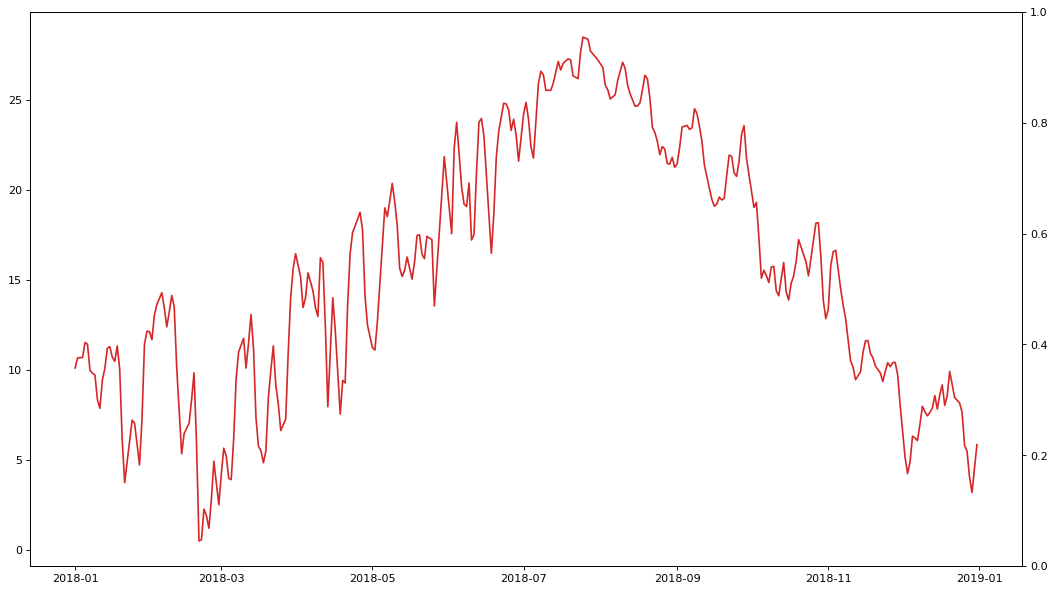

In [18]:
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(CA_Groceries["Order Date"], CA_Groceries["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(CA_Groceries["Order Date"], CA_Groceries["SMA7_Rev"], color='tab:blue')
#ax2.plot(CA_Groceries["Order Date"], CA_Groceries["SMA30_Rev"], color='tab:green')

# Formating
#ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels

plt.tight_layout()


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.set_ylabel('Temperature', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("SMA7 of Revenue", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Temperature vs SMA Revenue", fontsize=22)
fig.tight_layout()
plt.show()

## Granger Causality Test

# Granger Causality test for whole data (Fashion and Groceries)

We test if there is a significant correlation in all use states for average Temperature and Revenue of the Category

In [ ]:
## Fashion
Fashion_transactions
#Fashion_transactions["SMA7_Rev"] = Fashion_transactions["Revenue"].rolling(7).mean().round(3)

## Groceries
Grocerie_transactions


,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Category,Survey ResponseID,ppt,tmin,tmax,tavg,Revenue
35,2019-10-07,7.49,1.0,NJ,EDIBLE_OIL_VEGETABLE,R_01vNIayewjIIKMF,0.226,14.755,20.964,17.859,7.49
37,2019-10-07,7.34,1.0,NJ,EDIBLE_OIL_VEGETABLE,R_01vNIayewjIIKMF,0.226,14.755,20.964,17.859,7.34
43,2019-10-31,3.79,1.0,NJ,DAIRY_BASED_BUTTER,R_01vNIayewjIIKMF,9.024,14.610,18.571,16.591,3.79
44,2019-10-31,4.99,1.0,NJ,DAIRY_BASED_CHEESE,R_01vNIayewjIIKMF,9.024,14.610,18.571,16.591,4.99
45,2019-10-31,10.98,1.0,NJ,JERKY,R_01vNIayewjIIKMF,9.024,14.610,18.571,16.591,10.98
...,...,...,...,...,...,...,...,...,...,...,...
1850311,2020-12-18,13.80,1.0,OH,SUGAR_CANDY,R_zfnsck2ZatnGtY5,1.072,-3.184,-0.387,-1.786,13.80
1850334,2021-02-16,12.69,1.0,OH,COFFEE,R_zfnsck2ZatnGtY5,14.269,-8.688,-4.538,-6.613,12.69
1850346,2021-03-06,12.75,1.0,OH,COFFEE,R_zfnsck2ZatnGtY5,0.000,-5.970,5.056,-0.457,12.75
1850385,2021-05-11,16.12,1.0,OH,COFFEE,R_zfnsck2ZatnGtY5,0.382,3.729,14.768,9.249,16.12


# Grangers Causation Matrix for Revenue

### Grangers Causation Matrix for Fashion 

In [19]:
from utils.custom_granger_test import Granger_Causality_test_per_state

In [31]:
# List of states
states_list = Fashion_transactions["Shipping Address State"].unique()

# Creating Filtered dataframe
df_granger_test = Fashion_transactions[["Order Date", "Revenue", "tavg", "Shipping Address State"]]
df_granger_test = df_granger_test.set_index("Order Date")


In [32]:
#Granger_matrix_fashion = Granger_Causality_test_per_state(df= df_granger_test, states= states_list, log= False, sma= True)

Granger_matrix_fashion_30 = Granger_Causality_test_per_state(df_granger_test, states_list, sma=True, log= False,rolling_value=30)

State with ValueError:WY


### Grangers Causation Matrix for Groceries

In [33]:
# List of states
states_list = Grocerie_transactions["Shipping Address State"].unique()

# Creating Filtered dataframe
df_granger_groceries = Fashion_transactions[["Order Date", "Revenue", "tavg", "Shipping Address State"]]
df_granger_groceries = df_granger_groceries.set_index("Order Date")

#df_granger_groceries= df_granger_groceries.dropna()

In [34]:
Granger_matrix_groceries_30 = Granger_Causality_test_per_state(df_granger_groceries, states_list, sma=True, log= False,rolling_value=30)

State with ValueError:WY


Results are the same for Fashion and Groceries

## Plotting temp and revenue corrleation for north carolina 

### North Carolina

North carolina had a good granger causation value and a relative high sample size 

In [75]:
## Groceries
Groceries_filter = Grocerie_transactions["Shipping Address State"]== "NC"

NC_Groceries = Grocerie_transactions[Groceries_filter]

#NC_Groceries  = NC_Groceries[(NC_Groceries['Order Date'] >= '2018-12-1') & (NC_Groceries['Order Date'] < '2021-01-01')] 

NC_Groceries = NC_Groceries.sort_values("Order Date", ascending=True)

NC_Groceries = NC_Groceries.groupby("Order Date").agg({"Revenue": "sum", "tavg":"first"})

NC_Groceries["tavg"] = NC_Groceries["tavg"].rolling(30).mean()

NC_Groceries["SMA"] = NC_Groceries["Revenue"].rolling(30).mean()
NC_Groceries["SMA_lag"] = NC_Groceries["SMA"].shift(14)

NC_Groceries.reset_index(inplace=True)

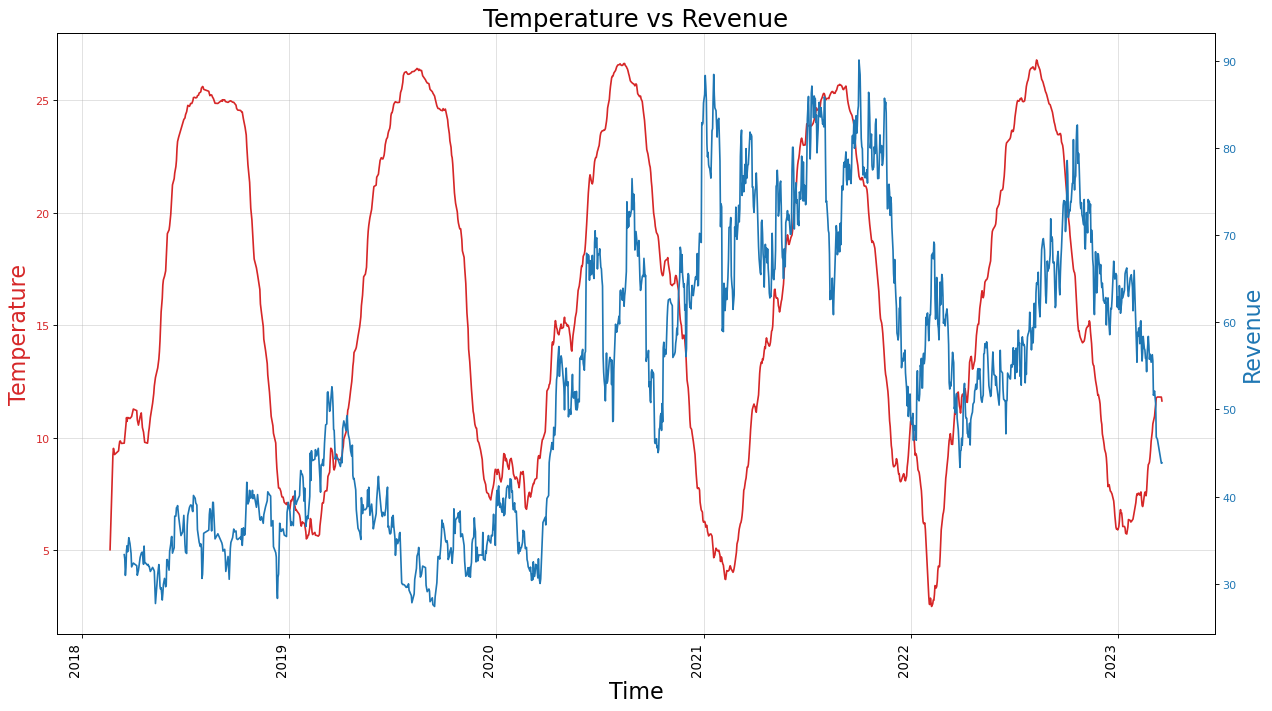

In [76]:

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(NC_Groceries["Order Date"], NC_Groceries["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(NC_Groceries["Order Date"], NC_Groceries["SMA_lag"], color='tab:blue')

# Formating
# ax.xaxis.set_major_locator(CA_Groceries.MonthLocator(bymonth=range(1,12,3))) 
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels



# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.set_ylabel('Temperature', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Revenue", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Temperature vs Revenue", fontsize=22)
fig.tight_layout()
plt.show()


### Massachusetts

In [38]:
Groceries_filter = Grocerie_transactions["Shipping Address State"]== "MA"

MA_Groceries = Grocerie_transactions[Groceries_filter]

MA_Groceries  = MA_Groceries[(MA_Groceries['Order Date'] >= '2018-1-1') & (MA_Groceries['Order Date'] < '2019-01-01')] 

MA_Groceries = MA_Groceries.sort_values("Order Date", ascending=True)


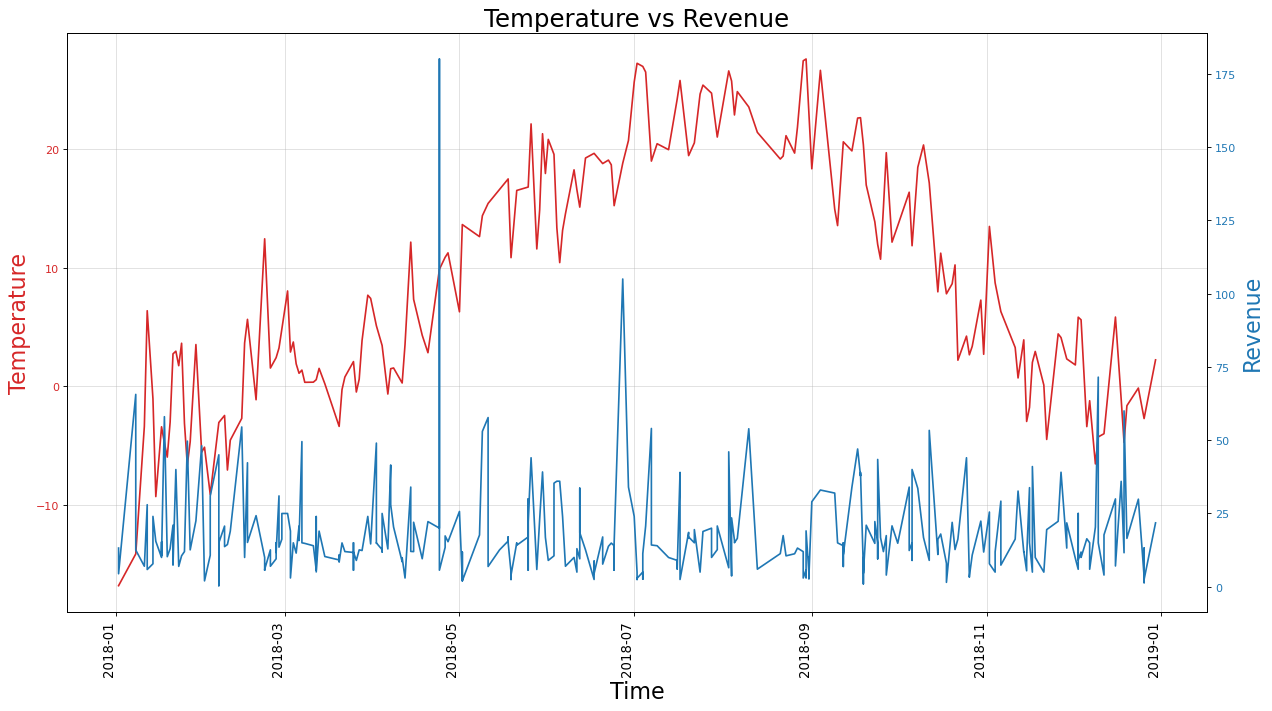

In [42]:

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(MA_Groceries["Order Date"], MA_Groceries["tavg"], color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(MA_Groceries["Order Date"], MA_Groceries["Revenue"], color='tab:blue')

# Formating
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right') # Rotating x-labels



# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=90, labelsize=12)
ax1.set_ylabel('Temperature', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Revenue", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Temperature vs Revenue", fontsize=22)
fig.tight_layout()
plt.show()


## Ploting temperature of high correlation states

In [40]:
Grocerie_transactions

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Category,Survey ResponseID,ppt,tmin,tmax,tavg,Revenue
1225643,2018-01-01,19.26,1.0,CA,MILK_SUBSTITUTE,R_3ff9iXWRr8CwTNI,0.003,3.878,16.340,10.109,19.26
1238021,2018-01-01,3.19,1.0,NV,TEA,R_3h3VvfXViksWH2f,0.000,-3.451,10.291,3.420,3.19
1211269,2018-01-01,9.68,1.0,KY,NUTS,R_3emmbwwsXsxt4Oj,0.003,-15.211,-6.816,-11.014,9.68
269229,2018-01-01,10.57,1.0,IL,BREAKFAST_CEREAL,R_1f8yxdZsr1sGMzz,0.001,-23.779,-12.906,-18.343,10.57
1238019,2018-01-01,6.49,1.0,NV,GROCERY,R_3h3VvfXViksWH2f,0.000,-3.451,10.291,3.420,6.49
...,...,...,...,...,...,...,...,...,...,...,...
1432635,2023-03-20,3.48,1.0,WV,BREAKFAST_CEREAL,R_8CXcySQawXPuJwJ,0.000,-9.255,0.404,-4.426,3.48
768572,2023-03-20,4.78,4.0,NC,GROCERY,R_2cCx0AHlJbsWbKA,0.010,-2.452,9.159,3.353,19.12
1432634,2023-03-20,14.79,1.0,WV,BREAKFAST_CEREAL,R_8CXcySQawXPuJwJ,0.000,-9.255,0.404,-4.426,14.79
1432630,2023-03-20,2.98,1.0,WV,SUGAR_CANDY,R_8CXcySQawXPuJwJ,0.000,-9.255,0.404,-4.426,2.98


In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(MA_Groceries["Order Date"], MA_Groceries["ppt"], color='tab:red')